# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откроем датасет, изучим общую информацию

In [1]:
# библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
# откроем файл, ознакомимся с данными
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# изучим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# изучим данные
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


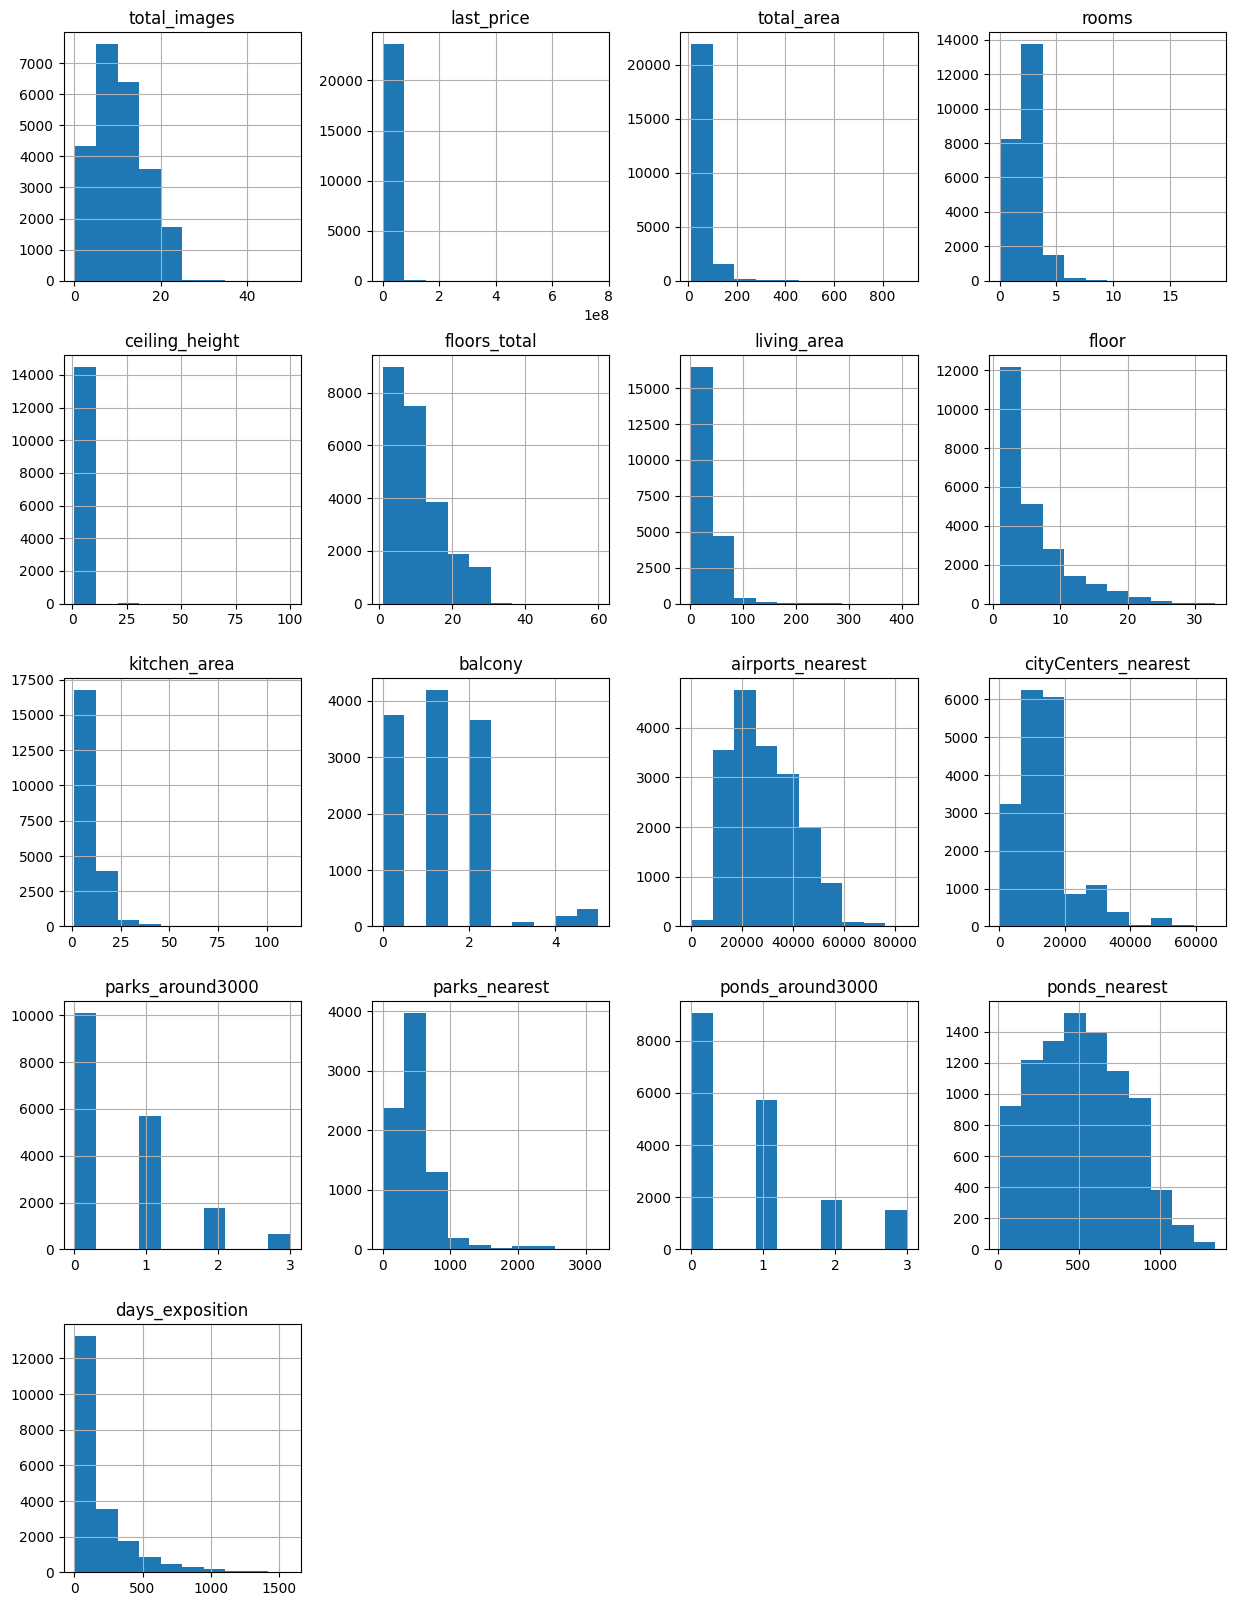

In [6]:
# построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

### Предобработка данных

In [7]:
# определим, в каких столбцах есть пропуски:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Обработка пропусков

**Анализ пропусков:**\
Как видно из таблицы, пропуски имеются в большом количестве столбцов, в некоторых пропусков даже больше, чем заполненных ячеек (parks_nearest, ponds_nearest, is_apartment). Проанализируем каждый столбец с пропусками в отдельности:

- Высота потолков. В домах типовой постройки высота потолков, как правило, стандартная - около 2,7 м. В "сталинках" или современных ЖК высота потолков может существенно отличаться (3,2 м.). Просто заполнить пропуски медианным или средним значением, на мой взгляд, не является корректным, это может искажать данные о зависимостях. Оставим этот столбец без изменений.
- Жилая площадь и площадь кухни. Общее количество пропусков - несущественное (менее 1%). Данные представляют собой количественные значения. Попытаемся заполнить пропуски, описание см. ниже.
- Этажность дома. Пропуски имеются всего в 89 строках (0,3% от общего кол-ва), итоговое влияние этих данных на результат будет несущественным. Удалим эти строки.
- Апартаменты или нет. В столбце булев тип данных. Апартаменты на рынке недвижимости предлагаются достаточно редко и как правило об этом указано в объявлении. Можно предположить, что в ячейках с пропусками данный параметр не был заполнен, а значит - это не апартаменты. Заменим все пропуски на значение "False".
- Балкон. Если продавец не указал количество балконов, то, вероятно, их просто нет в квартире. Заменим все пропуски на 0.
- Название населенного пункта. Мы не можем предположить, как корректно заменить пропуски. Кроме того, пропусков по этому параметру крайне мало - 49 шт (0,2% от общего количества строк). Таким образом, оставим пропуски в этом столбце без изменений.
- Расстояние до ближайшего аэропорта и до центра города. Использовать медианные или средние значения в данном случае будет некорректно, поскольку это исказит выводы. Расстояние от квартиры до центра или аэропорта - величина постоянная, кроме того, сильно влияющая на цену недвижимости (квартиры в центре дороже, чем квартиры на окраине, это логично и без проведения анализа). Таким образом, оставим пропуски в этом столбце без изменений.
- Число парков/водоемов и расстояние до них. Аналогично расстоянию до центра, во всех этих четырех столбцах оставляем пропуски без изменений.
- Срок экспозиции. Пока мы не провели исследование, сложно предположить, какие факторы влияют на срок экспозиции. Вероятно, однокомнатные квартиры являются более ликвидными на рынке. Однако, заполнять пропуски медианным значением в разрезе комнатности считаю не совсем верным. Поскольку на срок экспозиции влияют и такие факторы, как адекватность изначальной оценки стоимости квартиры, наличие скидки и т.п. Таким образом, оставим пропуски в этом столбце без изменений.

**Работа с пропусками** в столбцах "balcony", "is_apartment" и "floors_total":

In [8]:
# заполним пропуски в столбце 'is_apartment'
data['is_apartment'] = data['is_apartment'].fillna(False)

# заполним пропуски в столбце 'balcony'
data['balcony'] = data['balcony'].fillna(0)

# удалим пропуски в столбце 'floors_total'
data = data.loc[data['floors_total'] > 0]

**Работа с пропусками** в столбце "living_area". Для начала проверим, как зависит жилая площадь от общей (см. график ниже). Видим, что зависимость практически линейная - чем больше общая площадь, тем больше жилая. Логично предположить, что пропуски можно заполнить, рассчитав среднюю долю жилой площади от общей площади по всему датасету. Затем применить полученный коэффициент к строкам, где есть пропуски в столбце "living_area".

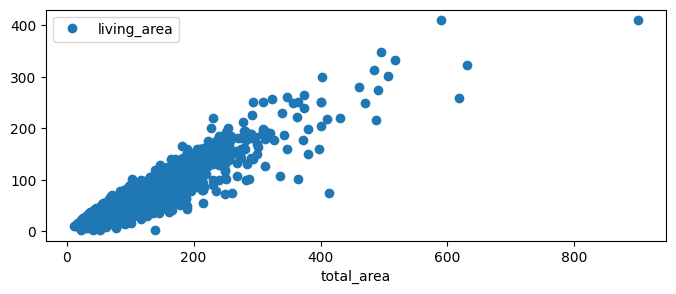

In [9]:
# построим точечный график - зависимость жилой площади от общей
data.plot(style='o', x='total_area', y='living_area', figsize=(8, 3));

In [10]:
# сделаем срез по столбцу 'living_area', оставив только строки со значениями
data_living = data.query('living_area > 0')

# рассчитаем среднее отношение жилой площади к общей
living_ratio = data_living['living_area'].sum() / data_living['total_area'].sum()
living_ratio

0.5736624611890823

In [11]:
# заполним пропуски значениями "общая площадь квартиры х долю жилой площади"
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] * living_ratio

**Работа с пропусками** в столбце "kitchen_area". Площадь кухни не может линейно зависеть от общей площади квартиры. Логично, что при росте общей площади площадь кухни должна увеличиваться, но до некоторого предела, поскольку это комната с определенным функционалом. Проверим, как соотносится площадь кухни с количеством комнат в квартире (см. сводную таблицу ниже).\
\
Как видим, и среднее, и медианное значение площади кухни растет вплоть до 10-ти комнатных квартир. Далее результаты слишком различаются, что вероятно обусловлено очень небольшим количеством наблюдений. Проверим количество квартир с количеством комнат больше 10 (kitchen_big = data.query('rooms > 10')) и увидим всего 8 строк в срезе, причем пропущенных значений в столбце "kitchen_area" нет. Эти данные не исказят нам итоговый результат. \
\
Таким образом, заполним пропуски средним значением площади кухни, сгруппировав данные по количеству комнат.

In [12]:
# проверим средние и медианные площади кухни в разбивке по количеству комнат:
kitchen_pivot = data.pivot_table(index='rooms', values='kitchen_area', aggfunc=['mean','median'])
kitchen_pivot

,mean,median
,kitchen_area,kitchen_area
rooms,,
1,9.548692,9.00
2,9.974912,8.70
3,11.293906,9.50
4,13.663009,11.05
5,18.367649,15.10
6,21.098229,19.75
7,21.998077,20.00
8,24.866667,25.00


In [13]:
# заменим пропуски средним значением площади кухни в зависимости от количества комнат в квартире
for k in data['rooms'].unique():
    data.loc[(data['rooms'] == k) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    data.loc[(data['rooms'] == k), 'kitchen_area'].mean()

# проверим, остались ли пропуски в столбце 'kitchen_area'
data.loc[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.500000,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.000000,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.750000,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.300000,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,14.341562,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.000000,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.000000,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,14.915224,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.000000,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Видим, что осталось 194 незаполненные строки, все с количеством комнат = 0 (проверено кодом: **data.loc[data['kitchen_area'].isna(), 'rooms'].unique())**. \
С помощью кода **data.loc[data['rooms'] == 0, 'total_area'].unique()** посмотрим список уникальных значений общей площади. Видим большое количество очень небольших квартир (площадью менее 28 кв.м) - это квартиры-студии. А также несколько квартир с большой площадью - вероятно, это квартиры в новостройках свободной планировки. \
\
Корректно заполнить пропуски по обеим этим категориям не считаю возможным. Оставим эти пропуски без изменений. \
\
Посмотрим информацию о таблице после заполнения всех пропусков.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23419 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Работа с пропусками_вывод**\
Мною были проанализированы пропуски и заполнены значениями там, где это было возможно корректно сделать. Все прочие пропуски оставим без изменений.\
Пропуски в данных появляются как в результате человеческого фактора, так и в результате технического фактора. В анализируемом датасете содержится два типа данных: добавленные пользователем и картографические. Очевидно, что многие пропуски обусловлены человеческим фактором - продавцы/риэлторы просто не вносили информацию в процессе заполнения объявления (высота потолков, площадь кухни, жилая площадь, апартаменты и т.п.). В случае с картографическими данными могла произойти как техническая ошибка (потеря при выгрузке, копировании и т.п.), так и человеческий фактор - пользователи не указывали местоположение квартиры. В столбце "days_exposition" информация должна выгружаться автоматически. Вероятно, пропуски связаны с какой-то ошибкой в процессе выгрузки.

#### Работа с типом данных

В таблице выше проанализируем тип данных. Видим 3 столбца, в которых нужно поменять тип данных:

- first_day_exposition - тип "object" переведем в формат "datetime", поскольку фактически в столбце находятся даты.
- floors_total - переведем из вещественного в целое число, ведь количество этажей не может быть дробным.
- balcony - переведем из вещественного в целое число, ведь количество балконов не может быть дробным.
Изменение типов данных необходимо для более удобной и понятной дальнейшей работы с датасетом. Например, при анализе влияния даты размещения объявления нам потребуется информация о месяце, дне и годе размещения. Получить эту информацию будет легко из ячеек с форматом "datetime", поэтому мы заранее готовим наш датасет к дальнейшей работе в рамках предобработки данных.

In [15]:
# меняем тип в столбце 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# меняем тип в столбцах 'floors_total' и 'balcony'
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23419 non-null  float64       
 13  balcony         

#### Устранение неявных дубликатов

Посмотрим список уникальных значений столбца 'locality_name'. Видим, что слово "поселок" в некоторых случаях пишется через "ё". Сначала приведем все значения к нижнему регистру, затем заменим "посёлок" на "поселок".

Несколько населенных пунктов в датасете встречаются и как "поселок", и как "поселок городского типа", либо вообще приведены с неправильным названием. Проверим по википедии правильный статус и заменим:
- Рябово - заменим "поселок" на "поселок городского типа";
- Коммунар - переименуем в датасете "поселок Коммунары" (такого в Ленинградской области нет) в Коммунар;
- Рощино - заменим "городской поселок" на "поселок городского типа";
- Павлово - заменим "городской поселок" и "село" на "поселок городского типа".

In [16]:
# выводим список уникальных значений
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
# приводим значения к нижнему регистру, изменения сохраняем в новый столбец
data['locality_name_edit'] = data['locality_name'].str.lower()

# заменим букву "ё" на "е", так как она встречается и в названиях, не только в слове "посёлок"
data['locality_name_edit'] = data['locality_name_edit'].str.replace('ё', 'е')

# заменим названия четырех населенных пунктов
data['locality_name_edit'] = data['locality_name_edit'].replace('поселок рябово', 'поселок городского типа рябово')
data['locality_name_edit'] = data['locality_name_edit'].replace('поселок коммунары', 'коммунар')
data['locality_name_edit'] = data['locality_name_edit'].replace('городской поселок рощино', 'поселок городского типа рощино')
data['locality_name_edit'] = data['locality_name_edit'].replace(['село павлово', 'городской поселок павлово'], 'поселок городского типа павлово')

#### Поиск и устранение аномальных значений

Проверим столбцы датасета на наличие аномальных значений:
- посредством кода *data['last_price'].sort_values()* обнаружили странную строку с ценой квартиры площадью 109 кв.м в размере 12 190 руб. Мы не знаем, ошибочная это цифра, или потерялось три нуля. Поэтому удалим эту строку. Остальные значения столбца на первый взгляд похожи на адекватные.
- в столбце 'total_area' все значения похожи на верные - от 12 кв.м (это может быть комната или студия) до 900 кв.м (пентхаус).
- в столбце 'ceiling_height' есть несколько значений ниже 2,0, а также экстремально высокие значения (32, 20, 100 и т.п.). В жилых помещениях высота потолков вряд ли может быть ниже 2 м. Верхним ограничением будем считать 6 м (пентхаусы, лофт-апартаменты и т.п.). Во всех строках с высоким значением потолков предполагаем, что ошибочно не проставлена запятая (т.е. 26 м - это 2,6 м.) - заменим в этих строках значения на корректные. В итоге осталось несколько значений ниже 2 м. и выше 8 м. - удалим эти строки, поскольку не понимаем природу этих искажений.
- при сортировке столбца 'living_area' видим (*data['living_area'].sort_values().unique()*), что минимальная площадь начинается от 2 кв.м. Очевидно, это ошибочные данные, поскольку площадь жилой комнаты сложно себе представить менее, чем 7-8 кв.м. Описание о работе с данным столбцом см. ниже.
- в столбцах first_day_exposition, rooms, floors_total, floor, kitchen_area, balcony значения выглядят достоверными.

In [18]:
# удалим строку со значением 12190 в столбце 'last_price'
data = data.loc[data['last_price'] != 12190]

# проверим все уникальные значения столбца 'ceiling_height'
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [19]:
# заменим значения высоты потолков выше 24 м. на исправленное
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] / 10

# оставим в датасете квартиры с высотой потолков более 2 м, менее 6 м, а также с пропущенными значениями. Все остальные строки удалим
data = data.loc[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 6) | (data['ceiling_height'].isna())]

In [20]:
# сделаем срез строк с экстремально низкими и высокими значениями столбца 'living_area'
data.query('living_area < 8 or living_area > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_edit
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.000000,17,False,...,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,санкт-петербург
5358,20,65000000.0,590.0,2019-02-14,15,3.5,6,409.000000,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,санкт-петербург
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.000000,2,False,...,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,санкт-петербург
16431,13,3799000.0,31.0,2018-04-12,1,2.6,5,6.000000,1,False,...,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,санкт-петербург
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.000000,8,False,...,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,санкт-петербург
17961,3,1400000.0,13.0,2017-12-03,1,2.6,9,7.457612,1,False,...,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,санкт-петербург
19251,19,4050000.0,33.0,2018-10-15,1,2.5,22,6.500000,21,False,...,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,санкт-петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.700000,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,санкт-петербург
19546,3,1850000.0,13.0,2019-03-11,1,3.4,5,7.457612,2,False,...,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0,санкт-петербург
19558,2,1686000.0,13.2,2018-12-17,1,NaN,5,7.572344,1,False,...,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0,санкт-петербург


*Работа со столбцом living_area*\
Соотносим общую площадь с жилой. Видим, что с высокими значениями все в порядке. С низкими - явно есть ошибки (квартиры общей площадью больше 30 кв.м и жилой менее 8 кв.м.), а также, вероятно, и реальные данные (квартиры общей площадью менее 30 кв.м и жилой менее 8 кв.м.). Удалим из датасета строки с очевидно ошибочными данными - квартиры общей площадью больше 30 кв.м и жилой менее 8 кв.м.

In [21]:
# оставим в датасете квартиры с жилой площадью более 8 кв.м и менее 8 кв.м. только для квартир общей площадью менее 30 кв.м.
# Все остальные строки удалим
data = data.loc[(data['living_area'] >= 8) | ((data['living_area'] < 8) & (data['total_area'] < 30))]

# посмотрим итоговую информацию о таблице после предобработки данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23582 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23582 non-null  int64         
 1   last_price            23582 non-null  float64       
 2   total_area            23582 non-null  float64       
 3   first_day_exposition  23582 non-null  datetime64[ns]
 4   rooms                 23582 non-null  int64         
 5   ceiling_height        14465 non-null  float64       
 6   floors_total          23582 non-null  int64         
 7   living_area           23582 non-null  float64       
 8   floor                 23582 non-null  int64         
 9   is_apartment          23582 non-null  bool          
 10  studio                23582 non-null  bool          
 11  open_plan             23582 non-null  bool          
 12  kitchen_area          23388 non-null  float64       
 13  balcony         

### Добавление новых расчетных столбцов

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

In [22]:
# добавим столбец "цена одного квадратного метра"
data['price_sqm'] = (data['last_price'] / data['total_area']).round()

# добавим столбец "день недели публикации объявления" (0 — понедельник, 1 — вторник и так далее)
data['day_exposition'] = data['first_day_exposition'].dt.weekday

# добавим столбец "месяц публикации объявления"
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

# добавим столбец "год публикации объявления"
data['year_exposition'] = data['first_day_exposition'].dt.year

# добавим столбец "расстояние до центра города в километрах"
data['city_center_km'] = round(data['cityCenters_nearest'] / 1000)

In [23]:
# добавим столбец "тип этажа квартиры" (значения — «первый», «последний», «другой»)
# функция для категоризации
def floor (row):
    floor = row['floor']
    floor_total = row['floors_total']

    if floor == 1:
        return 'первый'
    if floor == floor_total:
        return 'последний'
    return 'другой'

# добавим столбец
data['floor_type'] = data.apply(floor, axis=1)

In [24]:
# проверим результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_edit,price_sqm,day_exposition,month_exposition,year_exposition,city_center_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,NaN,санкт-петербург,120370.0,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0.0,NaN,81.0,поселок шушары,82921.0,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2.0,574.0,558.0,санкт-петербург,92786.0,3,8,2015,14.0,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.212331,9,False,...,3.0,234.0,424.0,санкт-петербург,408176.0,4,7,2015,7.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121.0,санкт-петербург,100000.0,1,6,2018,8.0,другой


### Исследовательский анализ данных

#### Анализ различных параметров квартир

**Гистограмма распределения общей площади**\
Построим гистограмму. На первом графике мы видим, что большинство квартир в датасете представляют собой квартиры площадью примерно от 30 до 100 кв.м. Построим второй график, ограничив ось Х для более детального анализа. На втором графике видим 3 пика - около 35-38 кв.м. (вероятно, однушки), около 45 кв.м. (преимущественно двушки) и 57-62 кв.м. (преимущественно трешки). В целом, наибольшее количество квартир сосредоточено в диапазоне от 30 до 65 кв.м. - это самые популярные квартиры в датасете.

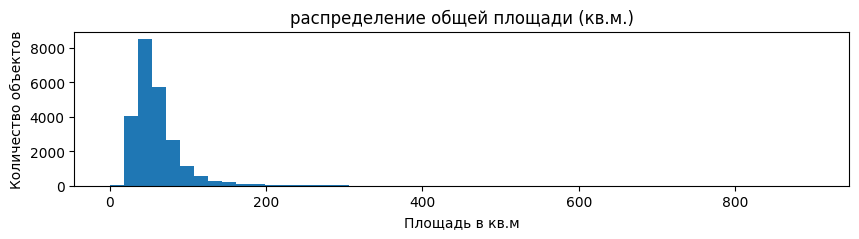

In [32]:
data['total_area'].plot(kind='hist', range = (0, 901), bins=50, title = 'распределение общей площади (кв.м.)', figsize = (10, 2))
plt.xlabel("Площадь в кв.м")
plt.ylabel("Количество объектов")
plt.show()

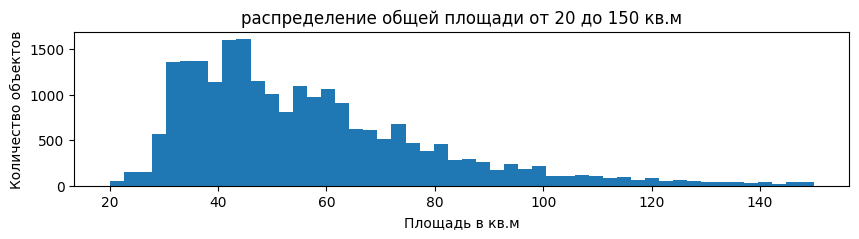

In [33]:
data['total_area'].plot(kind='hist', range = (20, 150), bins=50, title = 'распределение общей площади от 20 до 150 кв.м', figsize = (10, 2))
plt.xlabel("Площадь в кв.м")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения жилой площади**\
Построим гистограмму. На первом графике мы видим, что большинство квартир в датасете представляют собой квартиры с жилой площадью примерно от 10 до 90 кв.м. Построим второй график, ограничив ось Х для более детального анализа. На втором графике еще более явно, чем в графике общей площади, видим 3 пика - около 17-20 кв.м. (вероятно, однушки), около 30 кв.м. (преимущественно двушки) и 40-43 кв.м. (преимущественно трешки).

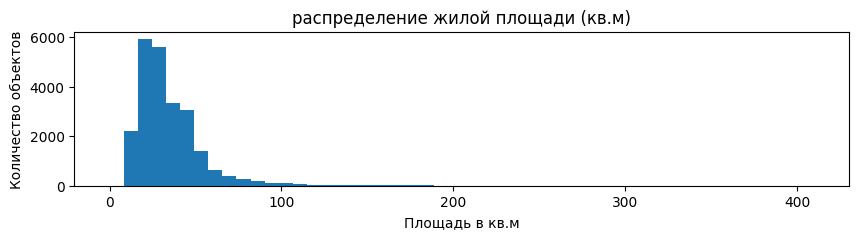

In [34]:
data['living_area'].plot(kind='hist', range = (0, 410), bins=50, title = 'распределение жилой площади (кв.м)', figsize = (10, 2))
plt.xlabel("Площадь в кв.м")
plt.ylabel("Количество объектов")
plt.show()

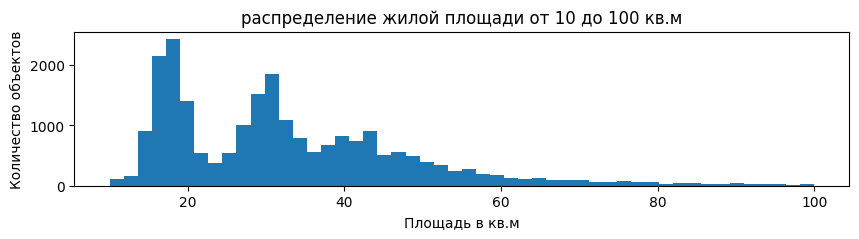

In [35]:
data['living_area'].plot(kind='hist', range = (10, 100), bins=50, title = 'распределение жилой площади от 10 до 100 кв.м', figsize = (10, 2))
plt.xlabel("Площадь в кв.м")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения площади кухни**\
Построим гистограмму. Аналогично приведенным выше графикам, ограничим ось Х, отрезав наиболее редкие значения (больше 40 кв.м.). На гистограмме мы видим, что площадь кухни для абсолютного большинства исследуемых квартир сосредоточилась в пределах 5-15 кв.м. При этом видим 2 пика:\
- значения около 5-7 кв.м. Вероятно, это дома старой постройки, панельные пятиэтажки (так называемые "хрущевки").\
- значения около 8-11 кв.м. - типовой размер кухни в большинстве домов с более комфортными планировками, чем в хрущевках. Например, в домах-сталинках, в домах более современной постройки.

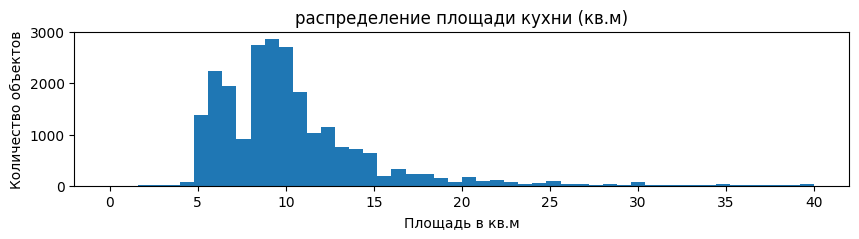

In [36]:
data['kitchen_area'].plot(kind='hist', range = (0, 40), bins=50, title = 'распределение площади кухни (кв.м)', figsize = (10, 2))
plt.xlabel("Площадь в кв.м")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения цен на объекты**\
Построим гистограмму. Ограничим ось Х, отрезав наиболее редкие значения (более 20 млн.руб.). На гистограмме мы видим, что наиболее часто встречающееся значение цены на объект - от 3 до 7 млн. руб.

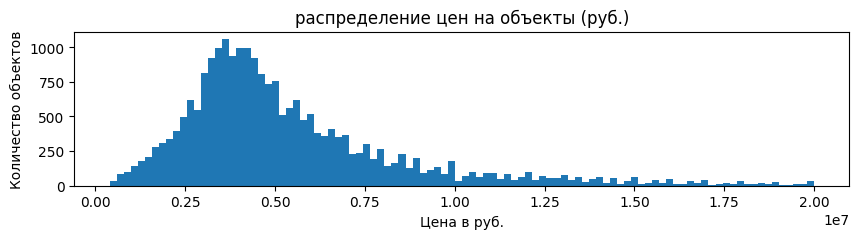

In [40]:
data['last_price'].plot(kind='hist', range = (400000, 20000000), bins=100, title = 'распределение цен на объекты (руб.)', figsize = (10, 2))
plt.xlabel("Цена в руб.")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения количества комнат**\
Построим гистограмму. Количество корзин = 20, поскольку список уникальных значений столбца = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19]. Из гистограммы видим, что в датасете больше всего однокомнатных квартир, практически столько же (но меньше) двухкомнатных, также достаточно большое количество трехкомнатных. Три эти типа квартир наиболее часто встречаются в датасете.

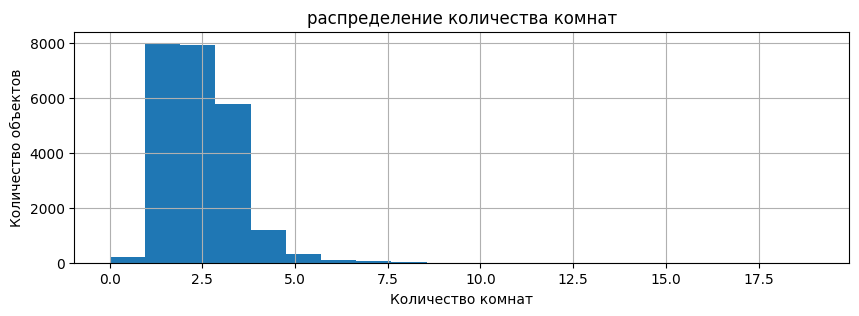

In [41]:
data['rooms'].plot(kind='hist', bins=20, title = 'распределение количества комнат', grid=True, figsize = (10, 3))
plt.xlabel("Количество комнат")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения высот потолков**\
Построим гистограмму. Наиболее часто встречаются квартиры с высотой потолков 2,5 м. Довольно распространены также с высотой 2,6-2,8 м. Отметим небольшой пик в районе 3 м. - это квартиры в домах-сталинках. Высоты потолков 3-3,5 м. характерны также для домов дореволюционной постройки. Как видим, общее количество таких квартир невелико.

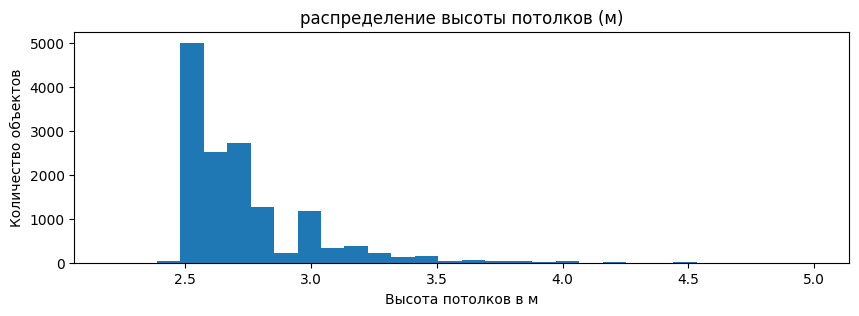

In [42]:
data['ceiling_height'].plot(kind='hist', range = (2.2, 5), bins=30, title = 'распределение высоты потолков (м)', figsize = (10, 3))
plt.xlabel("Высота потолков в м")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения по этажу расположения**\
Построим гистограмму. Наибольшее количество квартир в выборке расположены с 1 по 6 этаж, далее частота постепенно снижается по мере повышения этажа. Также можно выделить "ступеньку" вплоть до 10 этажа - тоже достаточно большое количество квартир в этом диапазоне. Квартиры, расположенные на этажах выше 20 встречаются редко.

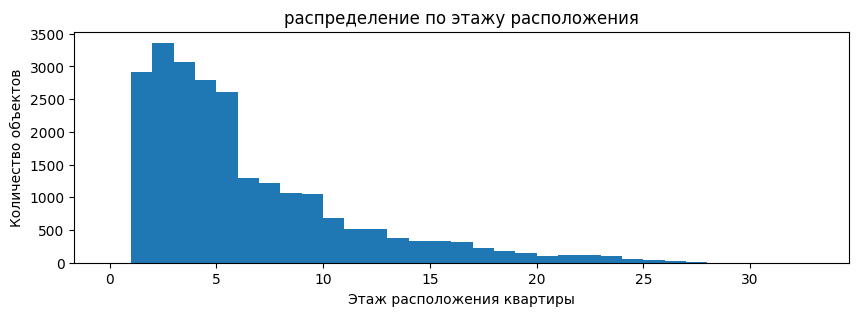

In [43]:
data['floor'].plot(kind='hist', range = (0, 33), bins=33, title = 'распределение по этажу расположения', figsize = (10, 3))
plt.xlabel("Этаж расположения квартиры")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения по типу этажа расположения**\
Построим гистограмму. Наибольшее количество квартир расположено на средних этажах, наименьшее - на первом.

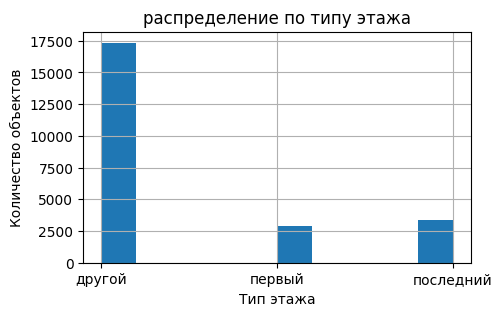

In [56]:
plt.figure(figsize=(5,3))
data['floor_type'].hist()
plt.title('распределение по типу этажа')
plt.xlabel("Тип этажа")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения общего количества этажей в доме**\
Построим гистограмму. Видим, что наиболее популярный тип домов - пятиэтажки. Также много девятиэтажных, 12-ти этажных, 16-ти этажных, 25-ти этажных.

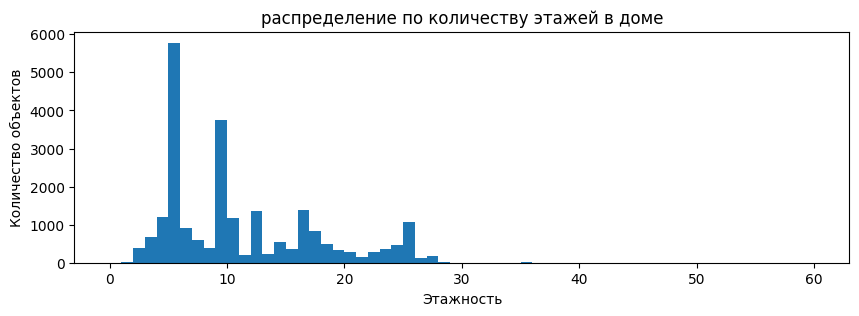

In [52]:
data['floors_total'].plot(kind='hist', range = (0, 60), bins=60, title = 'распределение по количеству этажей в доме', figsize = (10, 3))
plt.xlabel("Этажность")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения расстояния до центра города в метрах**\
Построим гистограмму. На гистограмме заметны два явных пика - около 6 км. от центра и около 11-18 км. от центра города. Второй пик - это квартиры, расположенные на окраине города, так называемые "спальные районы". Вероятно, там расположены более высотные дома, чем в центре, поэтому и количество квартир преобладает. Есть еще отдельные мелкие пики, это могут быть какие-то новые микрорайоны, в которых продается большое количество квартир.

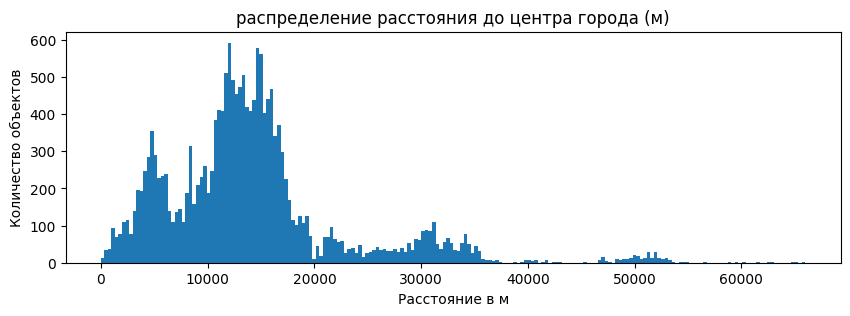

In [53]:
data['cityCenters_nearest'].plot(kind='hist', range = (0, 66000), bins=200, title = 'распределение расстояния до центра города (м)', figsize = (10, 3))
plt.xlabel("Расстояние в м")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения расстояния до ближайшего аэропорта**\
Построим гистограмму. Получился не самый информативный график, много мелких единичных пиков. В целом можно отметить, что большинство квартир расположены на удалении 10-55 км. от ближайшего аэропорта.

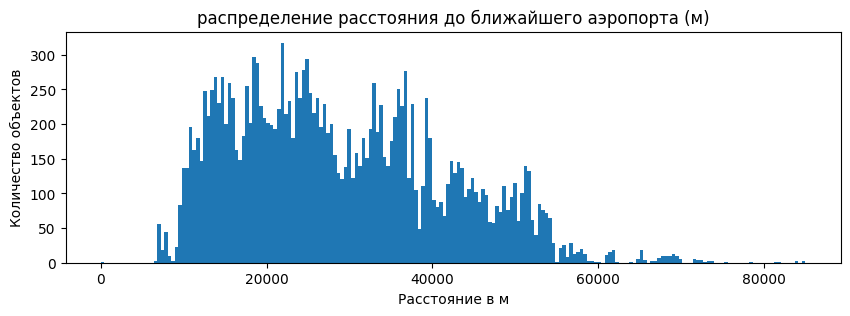

In [54]:
data['airports_nearest'].plot(kind='hist', range = (0, 85000), bins=200, title = 'распределение расстояния до ближайшего аэропорта (м)', figsize = (10, 3))
plt.xlabel("Расстояние в м")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения расстояния до ближайшего парка**\
Построим гистограмму. Видим, что абсолютное большинство квартир расположены на удалении менее 750 м. от парка, это пешеходная доступность. Можно сделать вывод, что парков в Санкт-Петербурге и окрестностях достаточно много.

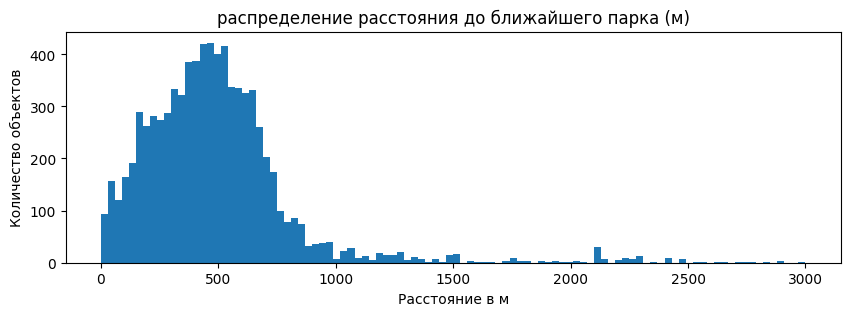

In [55]:
data['parks_nearest'].plot(kind='hist', range = (0, 3000), bins=100, title = 'распределение расстояния до ближайшего парка (м)', figsize = (10, 3))
plt.xlabel("Расстояние в м")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения по дням публицации объявления**\
Построим гистограмму. Четко прослеживается, что по выходным объявления публикуются существенно реже. Это может объясняться тем, что риэлторы по выходным заняты показами, а собственники - отдыхают.

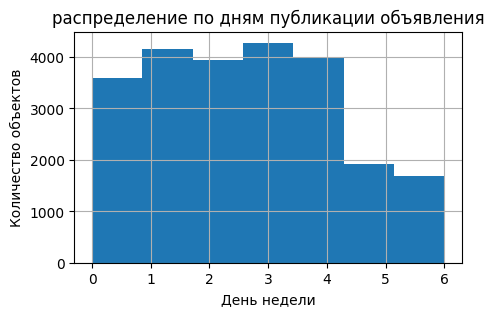

In [57]:
plt.figure(figsize=(5,3))
data['day_exposition'].hist(bins=7)
plt.title('распределение по дням публикации объявления')
plt.xlabel("День недели")
plt.ylabel("Количество объектов")
plt.show()

**Гистограмма распределения по месяцам публицации объявления**\
Построим гистограмму. Наиболее активные месяца - февраль, март, апрель и ноябрь. Наименьшее количество объявлений публикуется в мае, январе, декабре и летом. Это объясняется выходными и отпускными днями - многие продавцы предпочитают отложить вопрос о продаже квартиры на то время, когда они точно будут не в отпуске, поскольку продажа квартиры требует присутствия собственника (для показов - если продается без риэлтора, для заключения сделки и т.п.).

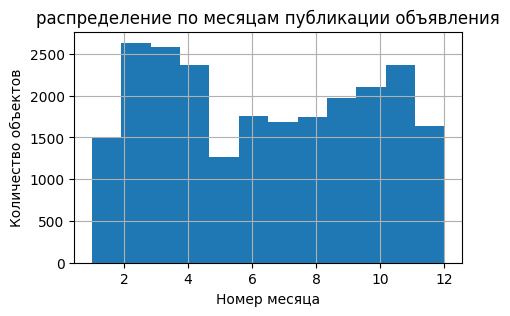

In [58]:
plt.figure(figsize=(5,3))
data['month_exposition'].hist(bins=12)
plt.title('распределение по месяцам публикации объявления')
plt.xlabel("Номер месяца")
plt.ylabel("Количество объектов")
plt.show()

#### Анализ скорости продажи квартир

Посчитаем среднее и медианное значение дней экспозиции. Построим 2 гистограммы по столбцу "days_exposition" - общую и более детальную.

In [59]:
mean_exposition = data['days_exposition'].mean()
median_exposition = data['days_exposition'].median()
print('Среднее число дней экспозиции:', round(mean_exposition))
print('Медианное число дней экспозиции:', round(median_exposition))

Среднее число дней экспозиции: 181
Медианное число дней экспозиции: 95


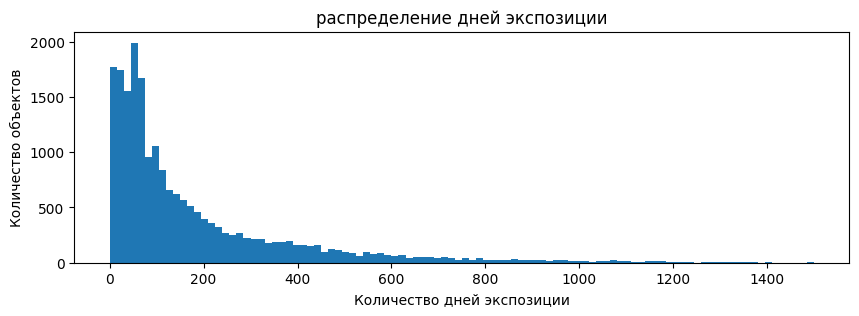

In [60]:
data['days_exposition'].plot(kind='hist', range = (0, 1500), bins=100, title = 'распределение дней экспозиции', figsize = (10, 3))
plt.xlabel("Количество дней экспозиции")
plt.ylabel("Количество объектов")
plt.show()

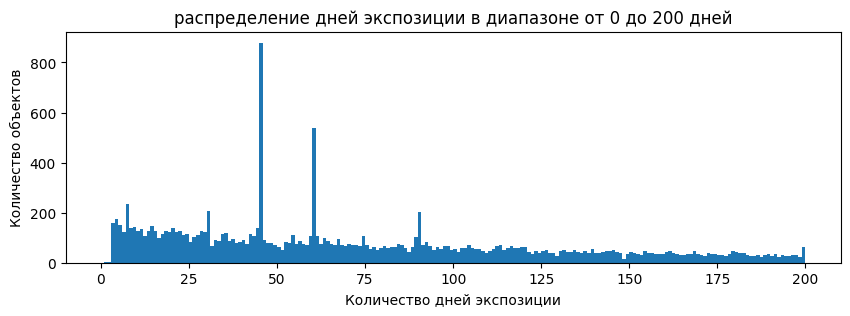

In [61]:
data['days_exposition'].plot(kind='hist', range = (0, 200), bins=200, title = 'распределение дней экспозиции в диапазоне от 0 до 200 дней', figsize = (10, 3))
plt.xlabel("Количество дней экспозиции")
plt.ylabel("Количество объектов")
plt.show()

Среднее число дней в экспозиции в 2 раза больше медианного. На медиану в данном случае существенное влияние оказывают резкие пики в районе 7, 30, 40, 60 и 90 дней - это похоже на стандартные сроки размещения объявлений. Не совсем понятно, были ли проданы эти квартиры или просто подошел срок окончания размещения объявления - и они были сняты, но не проданы.\
В данном случае среднее значение показывает более достоверную информацию. На первой гистограмме мы видим, что большинство квартир продается в срок до 400 дней, на второй - плавное снижение графика (если не учитывать вышеописанные пики).\
Можно сделать **вывод** о том, что в среднем квартиры продаются около полугода (180 дней). Быстрой продажей можно считать продажу в течение двух месяцев, необычно долгие продажи - более 1,5 лет.

#### Зависимость цены продажи от различных факторов

**Зависимость цены от общей площади**\
Построим график зависимости, ограничив ось Х значением 300 кв.м, а ось У - значением 150 млн.руб. Получили не самый информативный график, многие точки сливаются. В целом, видно, что чем больше площадь, тем выше цена, что является довольно очевидным. Дополнительно рассчитаем коэффициент корреляции Пирсона, чтобы оценить взаимосвязь двух показателей. Получили значение 0,65, что говорит о наличии взаимосвязи, хотя характер и не совсем линейный.

Коэффициент корреляции Пирсона: 0.6537516305209663


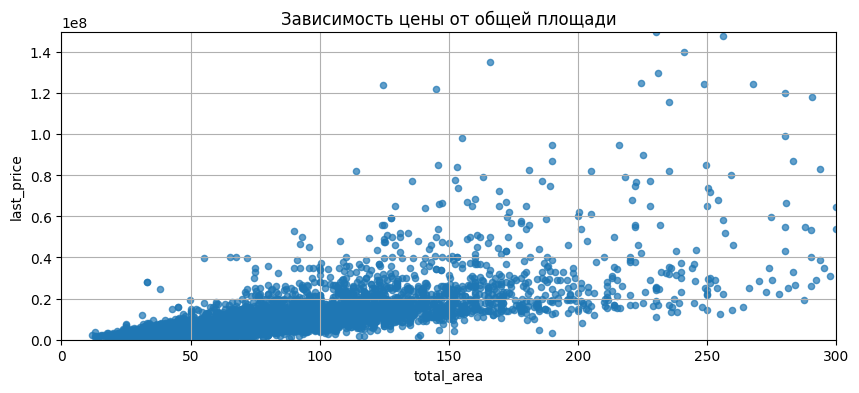

In [63]:
print('Коэффициент корреляции Пирсона:', data['total_area'].corr(data['last_price']))
data.plot(kind = 'scatter', x='total_area', y='last_price', style='o', xlim=(0, 300), ylim=(0, 150000000), alpha=0.7, grid=True, title = 'Зависимость цены от общей площади', figsize = (10, 4));

**Зависимость цены от жилой площади**\
Построим график зависимости, ограничив ось Х значением 200 кв.м, а ось У - значением 150 млн.руб. Получили график, аналогичный зависимости от общей площади, поскольку параметры общей и жилой площади коррелируют между собой. В целом, видно, что чем больше жилая площадь, тем выше цена, что является довольно очевидным. При этом зависимость уже не так очевидна, как на графике с общей площадью. Коэффициент корреляции Пирсона (0,59) подтверждает это наблюдение.

Коэффициент корреляции Пирсона: 0.5859890663632685


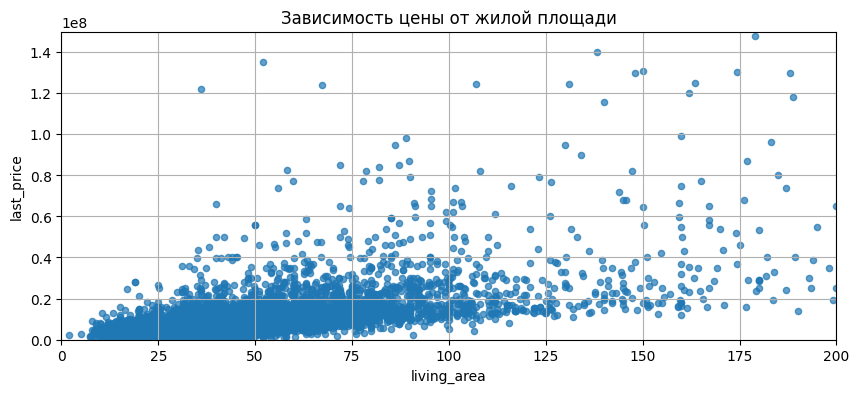

In [64]:
print('Коэффициент корреляции Пирсона:', data['living_area'].corr(data['last_price']))
data.plot(kind = 'scatter', x='living_area', y='last_price', style='o', xlim=(0, 200), ylim=(0, 150000000), alpha=0.7, grid=True, title = 'Зависимость цены от жилой площади', figsize = (10, 4));

**Зависимость цены от площади кухни**\
Построим график зависимости, ограничив ось Х значением 50 кв.м, а ось У - значением 150 млн.руб. График похож на графики зависимости от общей и жилой площади. В целом можно отметить восходящий тренд, то есть чем больше площадь кухни, тем больше цена, однако это зачастую связано с тем, что при возрастании общей площади растет и площадь кухни. Зависимость цены квартиры от площади кухни менее выражена, чем от общей площади. Об этом же свидетельствует и снижение коэффициента корреляции Пирсона (0,46).

Коэффициент корреляции Пирсона: 0.459174623055132


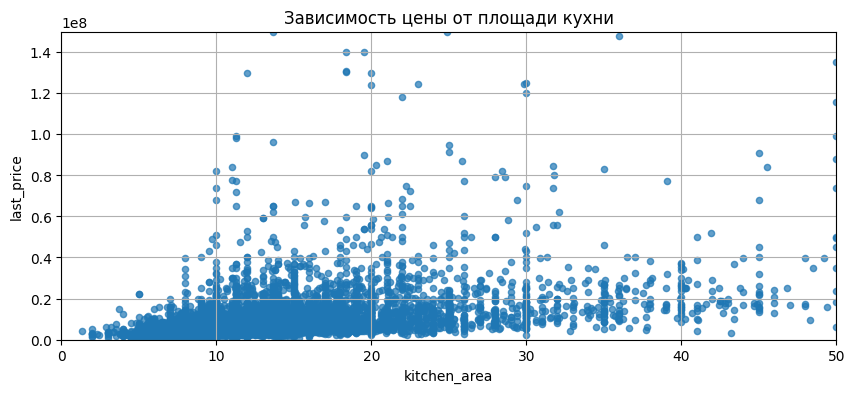

In [65]:
print('Коэффициент корреляции Пирсона:', data['kitchen_area'].corr(data['last_price']))
data.plot(kind = 'scatter', x='kitchen_area', y='last_price', style='o', xlim=(0, 50), ylim=(0, 150000000), alpha=0.7, grid=True, title = 'Зависимость цены от площади кухни', figsize = (10, 4));

**Зависимость цены от количества комнат**\
Построим сводную таблицу, в которой найдем среднее и медианное значение цены в разбивке по количеству комнат. По данным сводной таблицы построим графики.

In [66]:
# построим сводную таблицу
rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median'])
rooms_pivot.columns = ['price_mean', 'price_median']
rooms_pivot_res = rooms_pivot.reset_index()
rooms_pivot_res

,rooms,price_mean,price_median
0,0,3.344493e+06,2700000.0
1,1,3.834505e+06,3600000.0
2,2,5.590209e+06,4762338.0
3,3,8.164784e+06,6200000.0
4,4,1.332596e+07,9000000.0
5,5,2.379830e+07,14000000.0
6,6,3.188004e+07,19000000.0
7,7,5.147007e+07,24900000.0
8,8,5.022417e+07,23095000.0
9,9,3.415236e+07,23750000.0


*Вывод:* мы видим тенденцию, что чем больше количество комнат, тем больше цена. График с медианными значениями выглядит более адекватным. Резкий выброс в районе 12-ти комнатных квартир обусловлен единственным значением в данном диапазоне - квартира 900 кв.м. (самый крупный лот из всего датасета). Для итогового вывода графика удалим эту строку.

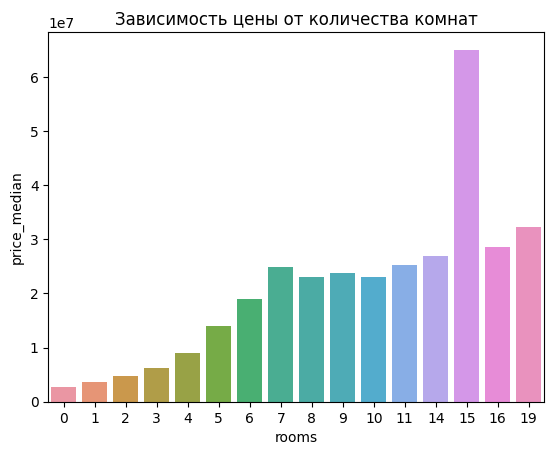

In [71]:
# удалим строку с 12-ти комнатной квартирой
rooms_pivot_res = rooms_pivot_res.loc[rooms_pivot_res['rooms'] != 12]

# построим график по новой таблице
seaborn.barplot(x=rooms_pivot_res['rooms'], y=rooms_pivot_res['price_median']).set_title('Зависимость цены от количества комнат');

**Зависимость цены от этажа, на котором расположена квартира**\
Построим сводную таблицу, в которой найдем среднее и медианное значение цены в разбивке по этажу расположения. По данным сводной таблицы построим графики.

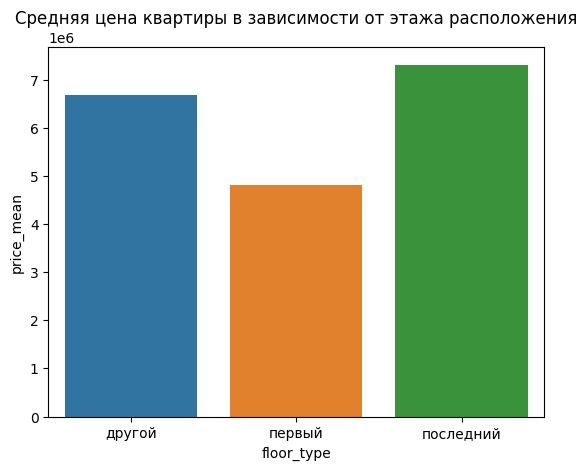

In [72]:
# строим сводную таблицу
floors_pivot = data.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median'])
floors_pivot.columns = ['price_mean', 'price_median']
floors_pivot_res = floors_pivot.reset_index()

# строим график по средним значениям
seaborn.barplot(x=floors_pivot_res['floor_type'], y=floors_pivot_res['price_mean']).set_title('Средняя цена квартиры в зависимости от этажа расположения');

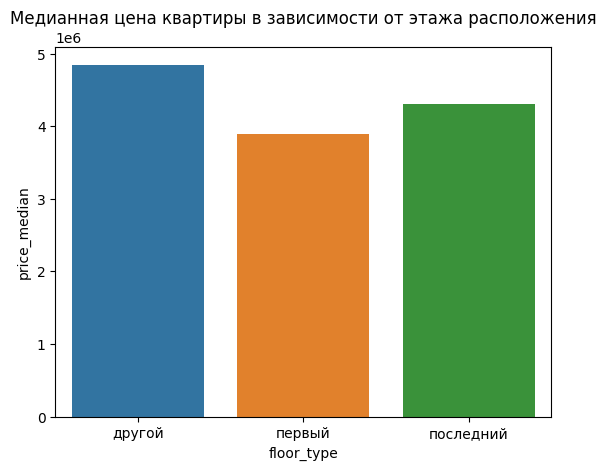

In [73]:
# строим график по медианным значениям
seaborn.barplot(x=floors_pivot_res['floor_type'], y=floors_pivot_res['price_median']).set_title('Медианная цена квартиры в зависимости от этажа расположения');

*Вывод:* на обоих графиках видим четкую зависимость - квартиры на 1 этажах стоят дешевле всего, квартиры на последних этажах стоят дороже, чем на первых, но дешевле, чем на средних этажах.

**Зависимость цены от дня недели размещения объявления**\
Построим сводную таблицу, в которой найдем среднее и медианное значение цены в разбивке по дням недели. По данным сводной таблицы построим графики.

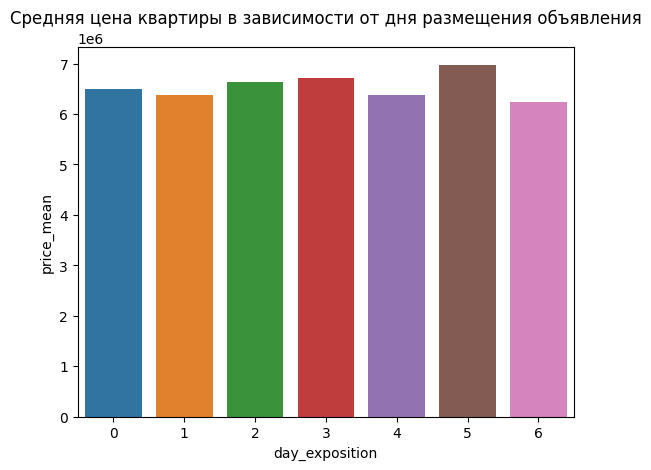

In [74]:
# строим сводную таблицу
day_pivot = data.pivot_table(index='day_exposition', values='last_price', aggfunc=['mean', 'median'])
day_pivot.columns = ['price_mean', 'price_median']
day_pivot_res = day_pivot.reset_index()

# строим график по средним значениям
seaborn.barplot(x=day_pivot_res['day_exposition'], y=day_pivot_res['price_mean']).set_title('Средняя цена квартиры в зависимости от дня размещения объявления');

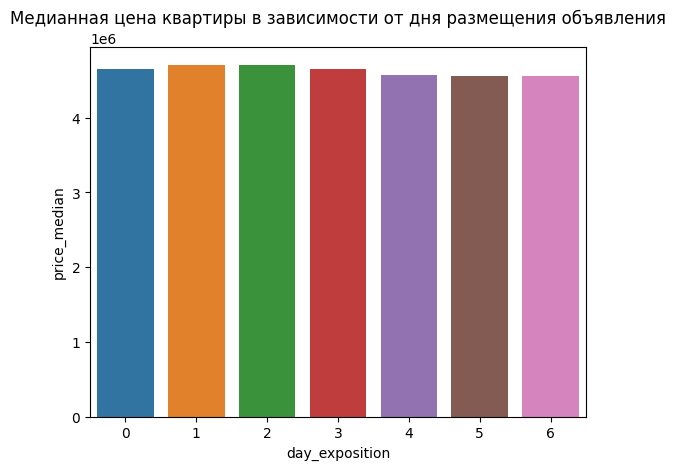

In [75]:
#строим график по медианным значениям
seaborn.barplot(x=day_pivot_res['day_exposition'], y=day_pivot_res['price_median']).set_title('Медианная цена квартиры в зависимости от дня размещения объявления');

*Вывод:* стоимость квартиры никак не зависит от дня размещения объявления.

**Зависимость цены от месяца размещения объявления**\
Построим сводную таблицу, в которой найдем среднее и медианное значение цены в разбивке по месяцам. По данным сводной таблицы построим графики.

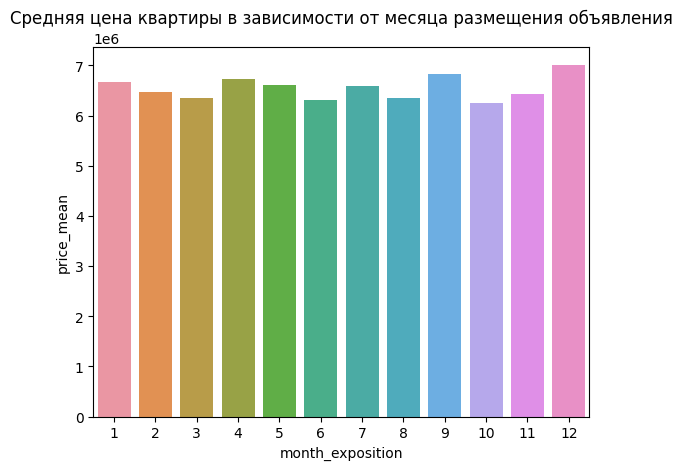

In [76]:
# строим сводную таблицу
month_pivot = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'median'])
month_pivot.columns = ['price_mean', 'price_median']
month_pivot_res = month_pivot.reset_index()

# строим график по средним значениям
seaborn.barplot(x=month_pivot_res['month_exposition'], y=month_pivot_res['price_mean']).set_title('Средняя цена квартиры в зависимости от месяца размещения объявления');

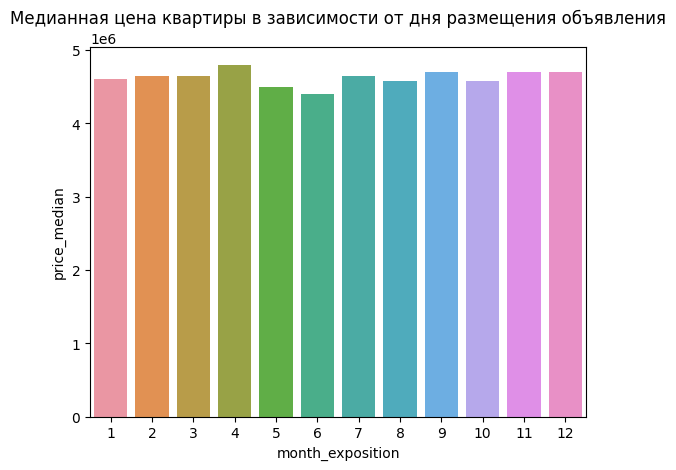

In [77]:
#строим график по медианным значениям
seaborn.barplot(x=month_pivot_res['month_exposition'], y=month_pivot_res['price_median']).set_title('Медианная цена квартиры в зависимости от дня размещения объявления');

*Вывод:* на графиках мы не видим четкой зависимости, лишь небольшие колебания от месяца к месяцу.

**Зависимость цены от года размещения объявления**\
Построим сводную таблицу, в которой найдем среднее и медианное значение цены в разбивке по годам. По данным сводной таблицы построим графики.

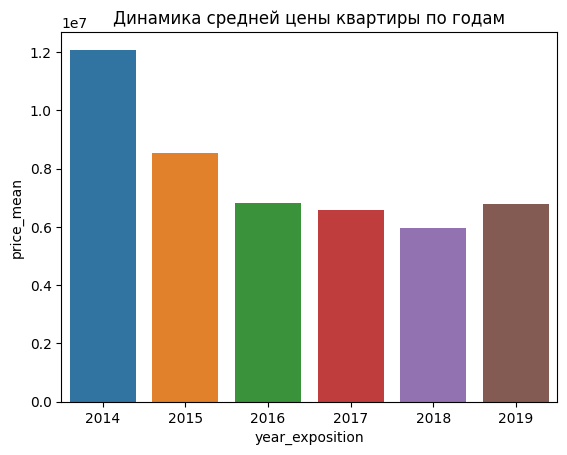

In [78]:
#строим сводную таблицу
year_pivot = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'median'])
year_pivot.columns = ['price_mean', 'price_median']
year_pivot_res = year_pivot.reset_index()

#строим график по средним значениям
seaborn.barplot(x=year_pivot_res['year_exposition'], y=year_pivot_res['price_mean']).set_title('Динамика средней цены квартиры по годам');

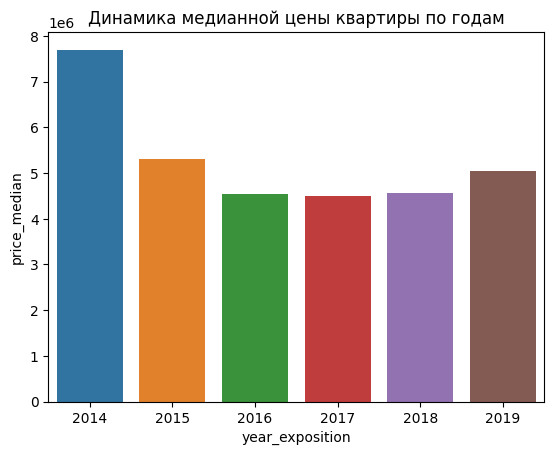

In [79]:
#строим график по медианным значениям
seaborn.barplot(x=year_pivot_res['year_exposition'], y=year_pivot_res['price_median']).set_title('Динамика медианной цены квартиры по годам');

*Вывод:* на графиках очень хорошо видна динамика цен на жилую недвижимость по годам. В 2014 году цены были достаточно высокими, затем началось затяжное падение вплоть до 2018 года. Лишь в 2019 году начался небольшой прирост цен.

#### Анализ цены квадратного метра

In [80]:
# посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
locality_pivot = data.pivot_table(index='locality_name_edit', values='price_sqm', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count', 'mean_price']
locality_pivot.sort_values('count', ascending = False).head(10)

,count,mean_price
locality_name_edit,,
санкт-петербург,15632,114797.758444
поселок мурино,552,85629.567029
поселок шушары,439,78551.359909
всеволожск,397,68719.322418
пушкин,369,103125.818428
колпино,338,75424.571006
поселок парголово,327,90175.886850
гатчина,307,68746.110749
деревня кудрово,299,92473.588629


**Вывод:** наибольшее количество объявлений - в Санкт-Петербурге. Все остальные населенные пункты представлены существенно меньше. В 10 населенных пунктов с наибольшим количеством объявлений попало много пригородов Санкт-Петербурга - Мурино, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Кудрово - все они расположены в непосредственной близости от города. Только города Гатчина и Выборг расположены не в непосредственной близости.  \
Наибольшая стоимость квадратного метра в данной выборке также характерна для Санкт-Петербурга. При этом стоимость не всегда зависит от статуса населенного пункта (например, в городе Выборг цены дешевле, чем в поселках Мурино или Шушары). Вероятно, бОльшее влияние на стоимость оказывает удаленность от г. Санкт-Петербург (Выборг расположен существенно дальше пригородов Мурино и Шушары). Однако, удаленность также не оказывает линейного влияния (например, Пушкин расположен дальше от города, чем Шушары, однако стоимость кв.м. там существенно выше). Отсюда мы можем сделать вывод о том, что на итоговую цену влияют множество факторов. В случае с городом Пушкин, вероятно, высокая стоимость жилья связана с тем, что город расположен на комфортно близком удалении от Санкт-Петербурга, а в самом городе расположен Государственный музей-заповедник Царское Село.

In [81]:
# выделим населённые пункты с самой высокой стоимостью квадратного метра
locality_pivot.sort_values('mean_price', ascending = False).head(10)

,count,mean_price
locality_name_edit,,
зеленогорск,24,115122.750000
санкт-петербург,15632,114797.758444
поселок репино,4,104238.500000
пушкин,369,103125.818428
сестрорецк,183,101757.639344
поселок лисий нос,3,100661.000000
кудрово,170,100166.294118
деревня мистолово,11,98550.000000
поселок левашово,1,96998.000000


In [82]:
# выделим населённые пункты с самой низкой стоимостью квадратного метра
locality_pivot.sort_values('mean_price', ascending = False).tail(10)

,count,mean_price
locality_name_edit,,
поселок житково,2,14956.000000
деревня ям-тесово,2,13711.500000
деревня сижно,1,13710.000000
поселок тесово-4,1,12931.000000
деревня малая романовка,1,12725.000000
поселок совхозный,2,12629.500000
деревня выскатка,2,12335.500000
деревня вахнова кара,1,11688.000000
поселок станции свирь,2,11481.500000


**Вывод:** в таблицах выше мы получили список населенных пунктов с самой высокой и низкой стоимостью квадратного метра. \
Помимо вполне ожидаемого Санкт-Петербурга в список самых "дорогих" также вошли Зеленогорск, Репино, Сестрорецк, Лисий Нос - это все курортные городки на берегу Финского залива, а также г. Пушкин. Таким образом, мы видим сильную зависимость цены жилой недвижимости от наличия объектов реакреации рядом, обычно в таких местах расположена самая фешенебельная недвижимость. \
В список наиболее дешевых населенных пунктов попали небольшие деревни и поселки, расположенные на большом удалении от областного центра. Качественная инфраструктура, как правило, в таких населенных пунктах отсутствует, что отражается на стоимости жилья.

#### Зависимость цены от расстояния до центра Санкт-Петербурга

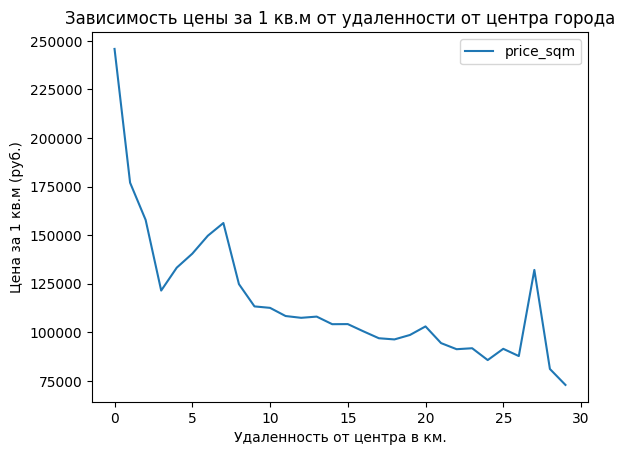

In [83]:
# сделаем срез квартир, расположенных только в г. Санкт-Петербург
data_spb = data.query('locality_name_edit == "санкт-петербург"')

# составим сводную таблицу, рассчитаем среднюю стоимость 1 кв.м для каждого км удаленности от центра
spb_pivot = data_spb.pivot_table(index='city_center_km', values='price_sqm')

# построим график зависимости цены 1 кв.м. от удаленности от центра города
spb_pivot.plot()
plt.title('Зависимость цены за 1 кв.м от удаленности от центра города')
plt.xlabel("Удаленность от центра в км.")
plt.ylabel("Цена за 1 кв.м (руб.)")
plt.show()

**Вывод:** на графике мы видим довольно очевидную зависимость цены 1 кв.м от удаленности от центра города - чем ближе квартира расположена к центру, тем дороже стоимость 1 кв.м. В районе 27 км. удаленности видим странный пик. Проанализируем, откуда он взялся.

In [84]:
# сделаем срез строк для 27-28 км. удаленности
data_spb.query('city_center_km > 26 and city_center_km <= 28')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_edit,price_sqm,day_exposition,month_exposition,year_exposition,city_center_km,floor_type
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,NaN,128.0,санкт-петербург,193919.0,1,11,2017,27.0,другой
814,0,7600000.0,111.0,2017-07-26,3,3.00,16,63.0,12,False,...,2.0,72.0,66.0,санкт-петербург,68468.0,2,7,2017,28.0,другой
1111,0,4072000.0,38.0,2015-10-14,1,NaN,5,16.0,4,False,...,0.0,NaN,285.0,санкт-петербург,107158.0,2,10,2015,28.0,другой
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,0.0,NaN,178.0,санкт-петербург,70312.0,1,2,2018,27.0,последний
9572,0,3413000.0,43.0,2015-11-10,1,NaN,5,18.0,1,False,...,0.0,NaN,258.0,санкт-петербург,79372.0,1,11,2015,28.0,первый
17798,0,4990000.0,71.0,2015-10-14,3,NaN,5,42.0,1,False,...,0.0,NaN,285.0,санкт-петербург,70282.0,2,10,2015,28.0,первый
18941,0,3666000.0,39.0,2015-11-09,1,NaN,5,16.0,2,False,...,0.0,NaN,259.0,санкт-петербург,94000.0,0,11,2015,28.0,другой
22916,0,5144000.0,64.0,2015-10-14,2,NaN,5,33.0,5,False,...,0.0,NaN,285.0,санкт-петербург,80375.0,2,10,2015,28.0,последний
23145,17,6300000.0,92.0,2017-07-20,3,NaN,16,46.0,7,False,...,2.0,46.0,14.0,санкт-петербург,68478.0,3,7,2017,28.0,другой


На расстоянии 27 км. находятся всего 2 квартиры, одна из них очень сильно выбивается по цене, что оказывает такое существенное влияние на график зависимости. Квартира достаточно обычная, из имеющихся данных невозможно объяснить, почему у нее такая высокая цена - возможно, просто ошибка или в квартире сделан очень дорогой ремонт. Правильным считаю убрать эту квартиру из выборки и построить график без нее.

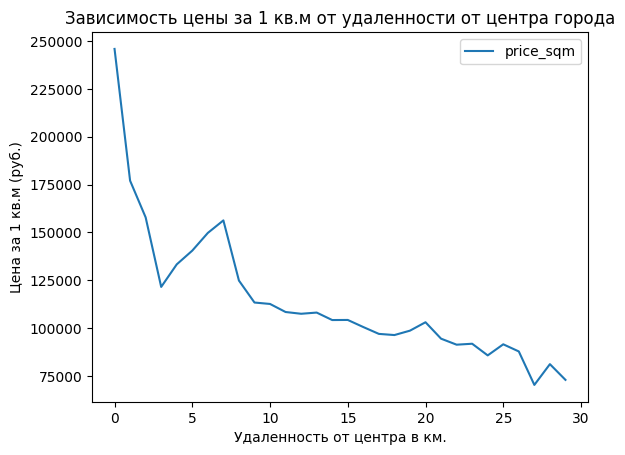

In [85]:
# удалим строку с выбросом из таблицы
data_spb = data_spb.loc[data_spb['price_sqm'] != 193919.0]

# составим сводную таблицу, рассчитаем среднюю стоимость 1 кв.м для каждого км удаленности от центра
spb_pivot = data_spb.pivot_table(index='city_center_km', values='price_sqm')

# построим график зависимости цены 1 кв.м. от удаленности от центра города
spb_pivot.plot()
plt.title('Зависимость цены за 1 кв.м от удаленности от центра города')
plt.xlabel("Удаленность от центра в км.")
plt.ylabel("Цена за 1 кв.м (руб.)")
plt.show()

**Вывод:** на графике мы видим довольно очевидную зависимость цены 1 кв.м от удаленности от центра города - чем ближе квартира расположена к центру, тем дороже стоимость 1 кв.м. Ниже отдельно проанализируем центральную часть города.

**Анализ зависимости цены от удаленности от центра для центральной части города**\
Проанализируем зависимость для центральной части города. Для этого сделаем срез всех квартир, расположенных в диаметре меньше 6 км. По карте города видим, что в наш срез попадают Василеостровский, Петроградский, Центральный, большая часть Адмиралтейского районов - это и есть центральная часть Санкт-Петербурга.

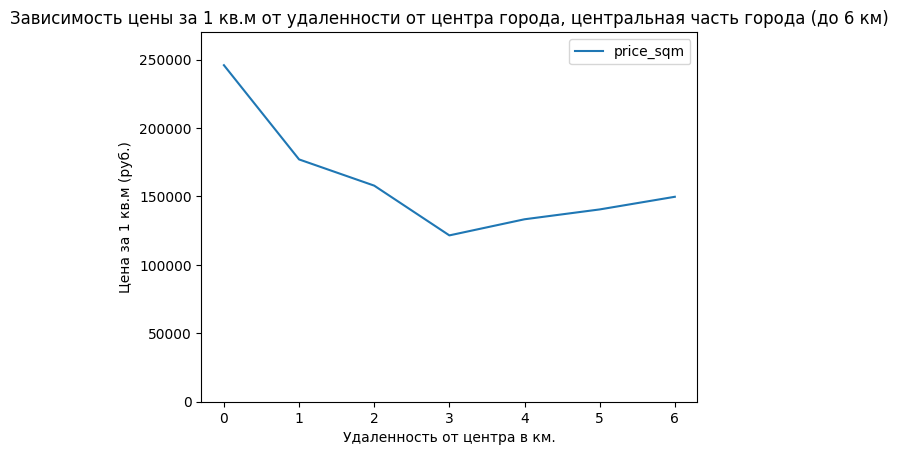

In [86]:
# сделаем срез квартир, расположенных в радиусе 6 км. от центра г. Санкт-Петербург
data_spb_center = data_spb.query('city_center_km <= 6')

# составим сводную таблицу, рассчитаем среднюю стоимость 1 кв.м для каждого км удаленности от центра
spb_center_pivot = data_spb_center.pivot_table(index='city_center_km', values='price_sqm')

# построим график зависимости цены 1 кв.м. от удаленности от центра города
spb_center_pivot.plot(ylim=(0, 270000))
plt.title('Зависимость цены за 1 кв.м от удаленности от центра города, центральная часть города (до 6 км)')
plt.xlabel("Удаленность от центра в км.")
plt.ylabel("Цена за 1 кв.м (руб.)")
plt.show()

На графике видим четкую зависимость от удаленности вплоть до 3 км, далее средняя цена за 1 кв.м незначительно повышается. Сложно сказать, почему зависимость не линейная. Возможно, на удалении 3 км имеются какие-либо факторы, снижающие цены на недвижимость (например, Московский вокзал расположен как раз на удалении 3 км. Для элитной недвижимости, которой и является в большинстве своем жилье в центре, наличие вокзала может оказывать сильное негативное влияние на стоимость, что и отражается в итоге на общей выборке). Построим еще одну сводную таблицу, чтобы посмотреть динамику средних цен по годам (см. таблицу ниже). Как видим из сводной таблицы, в среднем ситуация в разбивке по годам аналогичная - наименьшие цены наблюдаются на удалении 3-4 км. от центра. А значит, влияние каких-то случайных факторов маловероятно, такова особенность жилой недвижимости в Санкт-Петербурге.

In [87]:
# сводная таблица в разбивке по годам
spb_center_pivot2 = data_spb_center.pivot_table(index='city_center_km', columns='year_exposition', values='price_sqm')
spb_center_pivot2

year_exposition,2014,2015,2016,2017,2018,2019
city_center_km,,,,,,
0.0,433251.000000,197124.600000,140391.000000,253609.555556,194890.500000,350923.000000
1.0,NaN,143772.851852,145601.607143,145785.724638,193532.098039,358645.411765
2.0,311970.000000,176611.419355,160224.975610,159459.692913,141420.049383,162809.357143
3.0,178655.666667,137299.296296,100097.860465,113630.310345,129166.963303,129543.020000
4.0,115966.000000,134866.343750,127832.383721,138215.481328,127804.145374,140731.060606
5.0,139981.571429,130680.307692,136875.823129,141034.653495,143647.939516,145382.673913
6.0,178472.250000,160908.352941,141391.988235,151598.514151,143128.985507,164858.357143


### Общий вывод

В ходе данной работы мною был проанализирован датасет с данными о жилой недвижимости Санкт-Петербурга и Ленинградской области. Первый этап анализа - предобработка данных. Были определены и обработаны пропуски, дубликаты, типы данных, устранены аномальные значения во всех столбцах. \
Второй этап - анализ различных параметров квартир, скорости продажи квартир и зависимости цены недвижимости от факторов. \
\
**Результаты анализа**\
В ходе *анализа параметров* было определено, что большинство квартир представляют собой квартиры общей площадью примерно от 30 до 100 кв.м. и жилой площадью от 10 до 90 кв.м. Площадь кухни для абсолютного большинства исследуемых квартир сосредоточилась в пределах 5-15 кв.м. При этом можно выделить 2 группы: около 5-7 кв.м и около 8-11 кв.м. В разрезе комнатности больше всего однокомнатных квартир, практически столько же (но меньше) двухкомнатных, также достаточно большое количество трехкомнатных. Наиболее часто встречаются квартиры с высотой потолков 2,5 м. Довольно распространены также с высотой 2,6-2,8 м. Наибольшее количество квартир в выборке расположены с 1 по 6 этаж. Квартиры, расположенные на этажах выше 20 встречаются редко. Наиболее популярный тип домов - пятиэтажки. Также много девятиэтажных, 12-ти этажных, 16-ти этажных, 25-ти этажных. Абсолютное большинство квартир расположены на удалении менее 750 м. от парка. В разрезе даты публикации объявления хорошо видно, что по выходным объявления публикуются существенно реже, чем в будние дни. В течение года наиболее активные месяца публикации - февраль, март, апрель и ноябрь. Наименьшее количество объявлений публикуется в мае, январе, декабре и летом.\
\
Проанализировав *скорость продажи*, мы увидели, что в среднем квартиры продаются около полугода (180 дней). Быстрой продажей можно считать продажу в течение двух месяцев, необычно долгие продажи - более 1,5 лет.\
\
На *итоговую стоимость квартиры влияют* множество факторов, из которых особенно можно выделить общую площадь (с ней также взаимосвязаны такие показатели, как жилая площадь и количество комнат), этаж расположения квартиры (дешевле всего стоят квартиры на первом и последнем этажах), местоположение квартиры (чем ближе к центру города, тем дороже). Также была обнаружена сильная зависимость цены жилой недвижимости от наличия объектов реакреации рядом (памятники архитектуры, расположение на берегу залива).\
\
В ходе анализа мы также отследили *динамику цен* на жилую недвижимость по годам. В 2014 году цены были достаточно высокими, затем началось затяжное падение вплоть до 2018 года. Лишь в 2019 году начался небольшой прирост цен.\
\
**Основной вывод**\
На формирование итоговой цены объекта недвижимости влияют множество факторов: как характеристики самого объекта (общая площадь, количество комнат, этаж расположения и т.п.), так и характеристики местоположения (удаленность от центра, наличие парков в непосредственной близости и т.п.).